# Predicting the outcome of Disputes between country

In [69]:
# setting up the data frame
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
import itertools



## Importing the data and gathering information

In [70]:
#Import data
MIDA = pd.read_csv('/Users/NickThomas/Project_Mcnulty/data/raw/MIDA_4.01.csv')
MIDB = pd.read_csv('/Users/NickThomas/Project_Mcnulty/data/raw/MIDB_4.01.csv')

In [71]:
#Get a feel for the data
print("MIDA:", MIDA.shape)
print("MIDB:", MIDB.shape)
print("MIDA info:", MIDA.info())

MIDA: (2586, 24)
MIDB: (6132, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 24 columns):
DispNum3    2586 non-null int64
DispNum4    2586 non-null int64
StDay       2586 non-null int64
StMon       2586 non-null int64
StYear      2586 non-null int64
EndDay      2586 non-null int64
EndMon      2586 non-null int64
EndYear     2586 non-null int64
Outcome     2586 non-null int64
Settle      2586 non-null int64
Fatality    2586 non-null int64
FatalPre    2586 non-null int64
MaxDur      2586 non-null int64
MinDur      2586 non-null int64
HiAct       2586 non-null int64
HostLev     2586 non-null int64
Recip       2586 non-null int64
NumA        2586 non-null int64
NumB        2586 non-null int64
Link1       2586 non-null object
Link2       2586 non-null object
Link3       2583 non-null float64
Ongo2010    2586 non-null int64
Version     2586 non-null float64
dtypes: float64(2), int64(20), object(2)
memory usage: 485.0+ KB
MIDA info: None


In [72]:
#Get info for MIDB
print("MIDB info:", MIDB.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6132 entries, 0 to 6131
Data columns (total 20 columns):
DispNum3    6132 non-null int64
DispNum4    6132 non-null int64
StAbb       6132 non-null object
ccode       6132 non-null int64
StDay       6132 non-null int64
StMon       6132 non-null int64
StYear      6132 non-null int64
EndDay      6132 non-null int64
EndMon      6132 non-null int64
EndYear     6132 non-null int64
SideA       6132 non-null int64
RevState    6132 non-null int64
RevType1    6132 non-null int64
RevType2    6132 non-null int64
Fatality    6132 non-null int64
FataPre     6132 non-null int64
HiAct       6132 non-null int64
HostLev     6132 non-null int64
Orig        6132 non-null int64
Version     6132 non-null float64
dtypes: float64(1), int64(18), object(1)
memory usage: 958.2+ KB
MIDB info: None


The MIDB dataset contains more cases due to the fact that it looks at each country involved in a dispute whereas MIDA only looks at the disputes. The two datasets match on the column DispNum3 so they can be joined into a total data set.

## Cleaning the data

In [73]:
#Dropped missing values from Outcome and changed unclear settlement feature to missing
MIDA['Outcome'] = MIDA.Outcome.replace(8, np.nan)
MIDA['Outcome'] = MIDA.Outcome.replace(-9, np.nan)
MIDA_mask = MIDA.Outcome.notnull()
MIDA = MIDA[MIDA_mask]
MIDA['Settle'] = MIDA.Settle.replace(4, -9)

In [75]:
#Join the MID datasets into one data frame
MID_Total = MIDA.set_index('DispNum3').join(MIDB.set_index('DispNum3'), lsuffix='_A', rsuffix='_B')
MID_Total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5898 entries, 2 to 4598
Data columns (total 42 columns):
DispNum4_A    5898 non-null int64
StDay_A       5898 non-null int64
StMon_A       5898 non-null int64
StYear_A      5898 non-null int64
EndDay_A      5898 non-null int64
EndMon_A      5898 non-null int64
EndYear_A     5898 non-null int64
Outcome       5898 non-null float64
Settle        5898 non-null int64
Fatality_A    5898 non-null int64
FatalPre      5898 non-null int64
MaxDur        5898 non-null int64
MinDur        5898 non-null int64
HiAct_A       5898 non-null int64
HostLev_A     5898 non-null int64
Recip         5898 non-null int64
NumA          5898 non-null int64
NumB          5898 non-null int64
Link1         5898 non-null object
Link2         5898 non-null object
Link3         5892 non-null float64
Ongo2010      5898 non-null int64
Version_A     5898 non-null float64
DispNum4_B    5898 non-null int64
StAbb         5898 non-null object
ccode         5898 non-null int64


In [76]:
#Convert several columns to category
MID_Total.Outcome.astype('category')
MID_Total.Settle.astype('category')
MID_Total.Fatality_A.astype('category')
MID_Total.HiAct_A.astype('category')
MID_Total.HostLev_A.astype('category')
MID_Total.RevType1.astype('category')
MID_Total.RevType2.astype('category')
MID_Total.Fatality_B.astype('category')
MID_Total.HiAct_B.astype('category')
MID_Total.HostLev_B.astype('category')
MID_Total.StAbb.astype('category')
MID_Total.ccode.astype('category')
MID_Total.SideA.astype('category')
MID_Total.Recip.astype('category')
MID_Total.RevState.astype('category')

DispNum3
2       1
2       1
3       0
3       1
4       0
4       0
7       0
7       1
8       0
8       1
9       0
9       1
11      0
11      1
12      0
12      0
12      0
12      0
12      1
12      0
13      0
13      1
13      0
13      0
14      0
14      1
15      1
15      1
16      0
16      0
       ..
4583    0
4583    0
4584    1
4584    0
4586    1
4586    0
4587    1
4587    0
4588    1
4588    1
4589    0
4589    0
4590    0
4590    0
4591    0
4591    1
4592    0
4592    1
4593    0
4593    0
4594    0
4594    0
4595    0
4595    0
4596    1
4596    0
4597    0
4597    0
4598    1
4598    1
Name: RevState, Length: 5898, dtype: category
Categories (2, int64): [0, 1]

5.0    3868
1.0     436
7.0     397
4.0     369
6.0     345
2.0     243
3.0     181
9.0      59
Name: Outcome, dtype: int64
There is a stalemate 65.58 percent of the time


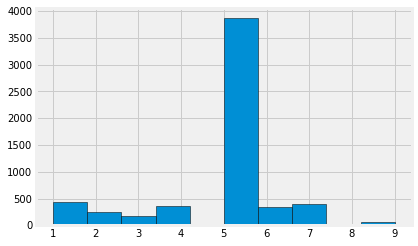

In [77]:
#Runs a histogram to show the high number of stalemate outcomes
MID_Total.Outcome.hist(edgecolor='black')
print(MID_Total.Outcome.value_counts())
print("There is a stalemate", round(100 * (3868 / (3868 + 2030)), 2), "percent of the time")

In [78]:
#Creates a binary classifer to run an analysis on outcomes that end in stalemate
MID_Total['Stalemate'] = (MID_Total['Outcome'] == 5).astype(int)

In [79]:
#Creates a seperate data frame for all other outcomes
no_mate_mask = MID_Total['Outcome'] != 5
MID_no_mate = MID_Total[no_mate_mask]
MID_no_mate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2030 entries, 2 to 4592
Data columns (total 43 columns):
DispNum4_A    2030 non-null int64
StDay_A       2030 non-null int64
StMon_A       2030 non-null int64
StYear_A      2030 non-null int64
EndDay_A      2030 non-null int64
EndMon_A      2030 non-null int64
EndYear_A     2030 non-null int64
Outcome       2030 non-null float64
Settle        2030 non-null int64
Fatality_A    2030 non-null int64
FatalPre      2030 non-null int64
MaxDur        2030 non-null int64
MinDur        2030 non-null int64
HiAct_A       2030 non-null int64
HostLev_A     2030 non-null int64
Recip         2030 non-null int64
NumA          2030 non-null int64
NumB          2030 non-null int64
Link1         2030 non-null object
Link2         2030 non-null object
Link3         2028 non-null float64
Ongo2010      2030 non-null int64
Version_A     2030 non-null float64
DispNum4_B    2030 non-null int64
StAbb         2030 non-null object
ccode         2030 non-null int64


Since Stalemates make up 65% of all outcomes, the dataset is unbalanced. I decided to attack the issue by doing two seperate analysis. The first analysis uses a binary claissfier with Stalemate being 1 and all the other outcomes being two. The second dataset uses the remaining 35% of the data that represents all other outcomes.

## Predicting Stalemates

In [80]:
#Gathers the features and target into a test train split
MID_Total = MID_Total.replace('147W', '147')
x_list = (['Settle', 'Fatality_B', 'HiAct_B', 'MaxDur', 'HostLev_B', 'Recip', 'NumA', 'NumB', 'ccode', 'Link1'])
X2 = MID_Total[x_list]
y2 = MID_Total.Stalemate
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.2, random_state=42)
ss = StandardScaler()
X2_train = ss.fit_transform(X2_train)
X2_test = ss.transform(X2_test)

In [81]:
#Ran a Random Forest Classifer
rf2 = RandomForestClassifier(n_estimators=50, max_depth=15)
rf2.fit(X2_train, y2_train)
print(rf2.score(X2_test, y2_test))
print(rf2.score(X2_train, y2_train))

0.8898305084745762
0.9510385756676558


In [82]:
#Other models are run as well
lm2 = LogisticRegression(C=1000)
lm2.fit(X2_train, y2_train)
lm2.score(X2_test, y2_test)

0.8059322033898305

In [83]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X2_train, y2_train)
knn2.score(X2_test, y2_test)

0.8457627118644068

In [84]:
dt2 = DecisionTreeClassifier(max_depth=15)
dt2.fit(X2_train, y2_train)
dt2.score(X2_test, y2_test)

0.8533898305084746

In [85]:
bc2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15), n_estimators=50, n_jobs=1)
bc2.fit(X2_train, y2_train)
print(bc2.score(X2_test, y2_test))
print(bc2.score(X2_train, y2_train))

0.8889830508474577
0.9703264094955489


In [86]:
#Creates a list of models to be evaluated in an ROC curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

models = [RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10), DecisionTreeClassifier(max_depth=None), 
          BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100, n_jobs=-1),
          SVC(probability=True), LogisticRegression(C=0.1), SGDClassifier(loss='log', random_state=42, alpha=0.01)]
model_names = ["Random Forest", "Decision Tree",'Bagging Classifier','SVC','Logistic','SGD-Log']

In [87]:
#Sets the ROC curve to determine which model is best
roc_plotting_stuff = []
for clf, name in zip(models, model_names):
    clf.fit(X2_train, y2_train)
    preds = clf.predict_proba(X2_test)
    fpr, tpr, _ = roc_curve(y2_test, preds[:,1])
    auc_score = auc(fpr, tpr)
    roc_plotting_stuff.append((name, tpr, fpr, auc_score))

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


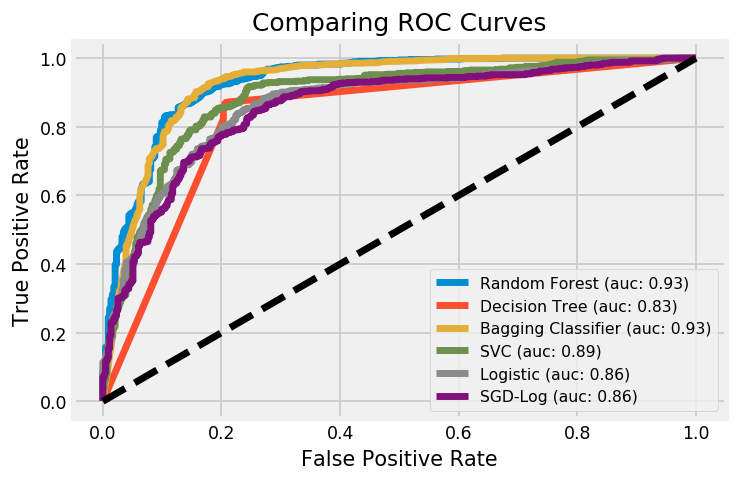

In [88]:
#Graphs the ROC curve
plt.figure(dpi=125)
for name, tpr, fpr, auc_score in roc_plotting_stuff:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparing ROC Curves");

In [89]:
#Provides the importance of all the features
for feat, imp in zip(range(1, 12), rf2.feature_importances_):
    print("Feat %i: "%feat, imp)

Feat 1:  0.4522127198475277
Feat 2:  0.026299752766463715
Feat 3:  0.0761241038824512
Feat 4:  0.15502573238938294
Feat 5:  0.03802452359148666
Feat 6:  0.012825459013789658
Feat 7:  0.0603648604939398
Feat 8:  0.03188965703657564
Feat 9:  0.127542279009188
Feat 10:  0.019690911969194706


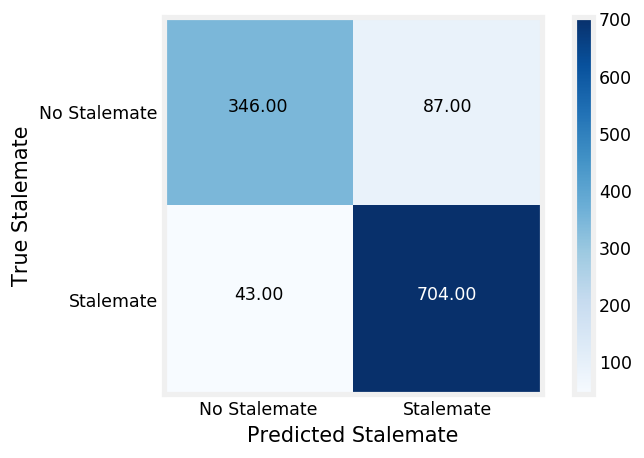

In [90]:
#Generates a confusion matrix to see how the model predicts stalemates
cm2 = confusion_matrix(y2_test, rf2.predict(X2_test))
plt.figure(dpi=125)
plt.imshow(cm2, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0,1], ('No Stalemate', 'Stalemate'))
plt.yticks([0,1], ('No Stalemate', 'Stalemate'));
plt.ylabel("True Stalemate")
plt.xlabel("Predicted Stalemate");
fmt = '.2f'
thresh = cm2.max() / 2.
for i, j in itertools.product(range(cm2.shape[0]), range(cm2.shape[1])):
    plt.text(j, i, format(cm2[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm2[i, j] > thresh else "black")

In [91]:
#Comapres the precision and recall
print(classification_report(y2_test, rf2.predict(X2_test)))


             precision    recall  f1-score   support

          0       0.89      0.80      0.84       433
          1       0.89      0.94      0.92       747

avg / total       0.89      0.89      0.89      1180



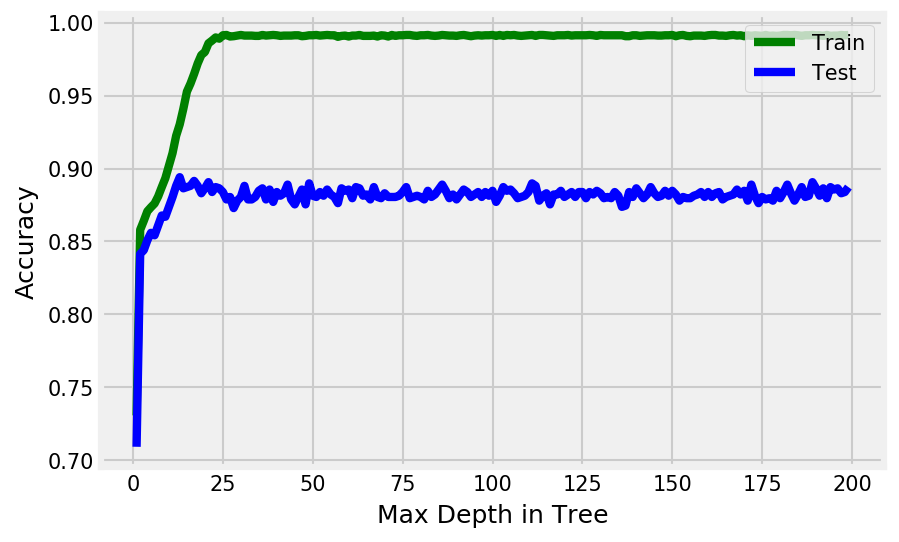

In [92]:
#Graphs the issue of overfitting in the data set
train_score = []
test_score = []

for depth in range(1,200):
    dt = RandomForestClassifier(n_estimators=50, max_depth=depth, n_jobs=-1)
    dt.fit(X2_train, y2_train)
    train_score.append(dt.score(X2_train, y2_train))
    test_score.append(dt.score(X2_test, y2_test))
    
plt.figure(dpi=150)
plt.plot(range(1,200), train_score, 'g', label="Train")
plt.plot(range(1,200), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

Overall the model had 89% accuracy. While the model overfit, there was no way to get rid of overfitting without also sacrificing accuracy. As the ROC curve demonstrates, the random forest classifier was the best model. For consistancy, the random forest classifier will be used and all features retained.

## Predicting all other outcomes

In [93]:
#Creates a test-train split for all other outcomes
x_list = (['Settle', 'Fatality_B', 'HiAct_B', 'MaxDur', 'HostLev_B', 'Recip', 'NumA', 'NumB', 'ccode', 'Link1'])
X = MID_no_mate[x_list]
y = MID_no_mate.Outcome
#X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [95]:
#Runs a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=15)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print(rf.score(X_train, y_train))

0.7660098522167488
0.979679802955665


In [96]:
#Provides the feature importance 
for feat, imp in zip(range(1, 12), rf.feature_importances_):
    print("Feat %i: "%feat, imp)

Feat 1:  0.15892171427910856
Feat 2:  0.049514591202793376
Feat 3:  0.12971784031579173
Feat 4:  0.21887714103345984
Feat 5:  0.046406028071509925
Feat 6:  0.049702608867453694
Feat 7:  0.11101009490290076
Feat 8:  0.06988491101292517
Feat 9:  0.14559073370974476
Feat 10:  0.02037433660431219


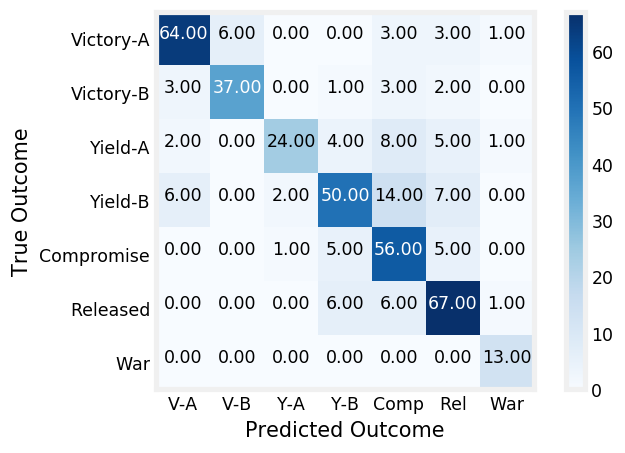

In [97]:
#Creates a confusion matrix for the other outcomes
names = ['Victory-SideA', 'Victory-SideB', 'Yield-SideA', 'Yield-SideB', 'Compromise', 'Released', 'Joins ongoing War']
plt.figure(dpi=125)
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.grid(False)
plt.colorbar();
plt.xticks([0,1,2,3,4,5,6], ('V-A', 'V-B', 'Y-A', 'Y-B', 'Comp', 'Rel', 'War'))
plt.yticks([0,1,2,3,4,5,6], ('Victory-A', 'Victory-B', 'Yield-A', 'Yield-B', 'Compromise', 'Released', 'War'));
plt.ylabel("True Outcome")
plt.xlabel("Predicted Outcome");
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [98]:
#Compares precision and recall on the other outcomes
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

        1.0       0.85      0.83      0.84        77
        2.0       0.86      0.80      0.83        46
        3.0       0.89      0.55      0.68        44
        4.0       0.76      0.63      0.69        79
        6.0       0.62      0.84      0.71        67
        7.0       0.75      0.84      0.79        80
        9.0       0.81      1.00      0.90        13

avg / total       0.78      0.77      0.76       406



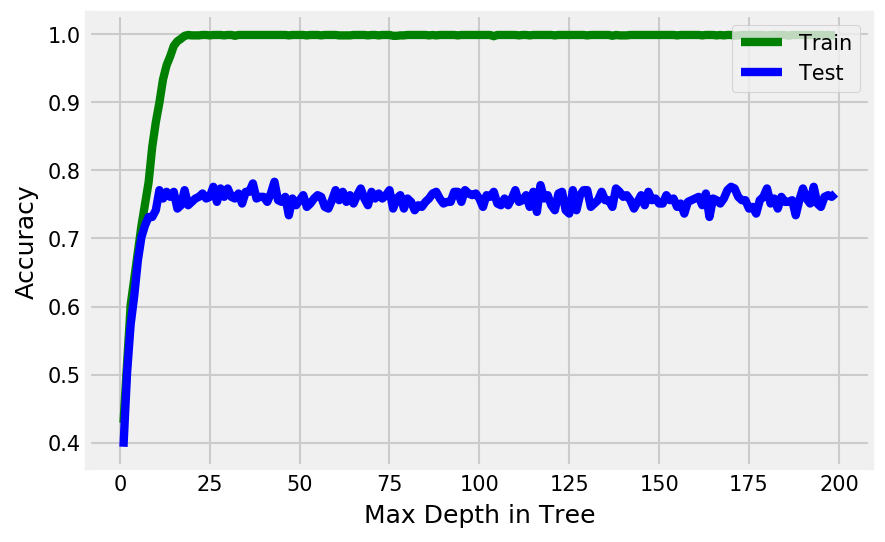

In [99]:
#Displays the overfitting issue
train_score = []
test_score = []

for depth in range(1,200):
    dt = RandomForestClassifier(n_estimators=50, max_depth=depth, n_jobs=-1)
    dt.fit(X_train, y_train)
    train_score.append(dt.score(X_train, y_train))
    test_score.append(dt.score(X_test, y_test))
    
plt.figure(dpi=150)
plt.plot(range(1,200), train_score, 'g', label="Train")
plt.plot(range(1,200), test_score, 'b', label="Test")
plt.legend(loc='upper right')
plt.xlabel("Max Depth in Tree")
plt.ylabel("Accuracy");

The model preformed well but was not as accurate as the stalemate model. There were also the same issues with overfitting. Predictions for yield outcomes were lower than the rest of the model and war was not a very common outcome. Even with the features, predicting conflict can be difficult and where a conflict's circumstances fit on the features will be subject to constant change. For example, while countries involved in a dispute might seek to impose a solution on each other, a change in this approach would change the model's predictions. There may also be some underlying issues with the MID dataset. [link](https://academic.oup.com/isq/article-abstract/60/4/719/2918882/An-Analysis-of-the-Militarized-Interstate-Dispute?redirectedFrom=fulltext)